In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = {
  "turn": 14,
  "board": {
    "height": 11,
    "width": 11,
    "food": [
      #{"x": 5, "y": 5}, 
      {"x": 9, "y": 0}, 
      {"x": 2, "y": 6}
    ],
    "hazards": [
      {"x": 3, "y": 2}
    ],
    "snakes": [
      {
        "id": "snake-508e96ac-94ad-11ea-bb37",
        "name": "My Snake",
        "health": 54,
        "body": [
          {"x": 0, "y": 0}, 
          {"x": 1, "y": 0}, 
          {"x": 2, "y": 0}
        ],
        "latency": "111",
        "head": {"x": 0, "y": 0},
        "length": 3,
        "shout": "why are we shouting??",
        "squad": "",
        "customizations":{
          "color":"#FF0000",
          "head":"pixel",
          "tail":"pixel"
        }
      }, 
      {
        "id": "snake-b67f4906-94ae-11ea-bb37",
        "name": "Another Snake",
        "health": 16,
        "body": [
          {"x": 5, "y": 4}, 
          {"x": 5, "y": 3}, 
          {"x": 6, "y": 3},
          {"x": 6, "y": 2}
        ],
        "latency": "222",
        "head": {"x": 5, "y": 4},
        "length": 4,
        "shout": "I'm not really sure...",
        "squad": "",
        "customizations":{
          "color":"#26CF04",
          "head":"silly",
          "tail":"curled"
        }
      }
    ]
  },
      "you": {
      "id": "snake-508e96ac-94ad-11ea-bb37",
        "name": "My Snake",
        "health": 54,
        "body": [
        {"x": 0, "y": 0}, 
        {"x": 1, "y": 0}, 
        {"x": 2, "y": 0}
        ],
        "latency": "111",
        "head": {"x": 0, "y": 0},
        "length": 3,
        "shout": "why are we shouting??",
        "squad": "",
        "customizations":{
        "color":"#FF0000",
        "head":"pixel",
        "tail":"pixel"
        }
    }
}

In [6]:
food_weight = 5
snake_weight = -9
snake_head_weight = -2
wall_weight = -9

In [4]:
def gkern(l=10, scale=10):
    """\
    creates gaussian kernel with side length `l` and a sigma of `sig`
    """
    sig = (l-1)/3
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sig))
    kernel = np.outer(gauss, gauss)
    return scale * kernel / np.max(kernel)

In [3]:
def centre_grad(data: dict) -> np.array:
  board_w = data["board"]["width"]
  board_h = data["board"]["height"]
  gradient_board = gkern(max(board_w, board_h))

  return gradient_board

food_x: 9, food_y: 0
kernel_size: 11
mid: 5
pad_x: -4, pad_y: 5


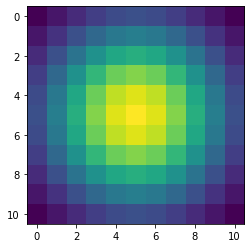

In [51]:
food = {"x": 9, "y": 0}
food_x, food_y = food['x'], food['y']
kern_size = max(11, 11)
kernel = gkern(kern_size, food_weight)
mid = kern_size // 2
pad_x  = mid - food_x
pad_y = mid - food_y
pad_x_tmp = None
pad_y_tmp = None

print(f"food_x: {food_x}, food_y: {food_y}")
print(f"kernel_size: {kern_size}")
print(f"mid: {mid}")
print(f"pad_x: {pad_x}, pad_y: {pad_y}")
plt.imshow(kernel)
plt.show()

In [52]:
if pad_x > 0: 
  pad_x_tmp = (0, pad_x)
else: 
  pad_x_tmp = (-pad_x, 0)
  
if pad_y > 0: 
  pad_y_tmp = (0 , pad_y)
else: 
  pad_y_tmp = (-pad_y, 0)

pad = (pad_x_tmp, pad_y_tmp)
print(food_x, food_y, pad)
kernel = np.pad(kernel, pad, "constant", constant_values=0)


9 0 ((4, 0), (0, 5))


In [53]:
if pad_x >= 0:
  kernel = kernel[pad_x:,:]
else:
  kernel = kernel[0:pad_x,:]
if pad_y >= 0:
  kernel = kernel[:, pad_y:]
else:
  kernel = kernel[:, :pad_y]



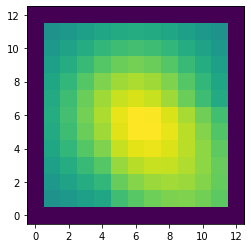

In [54]:
board = centre_grad(data)
board_x, board_y = 11, 11
board += kernel
board = np.pad(board, 1, 'constant', constant_values=snake_weight)

plt.imshow(np.rot90(np.fliplr(board)), interpolation='none', origin="lower")
plt.show()
